In [9]:
#!easy_install fancyimpute
#!pip install missingpy

distributed 1.21.8 requires msgpack, which is not installed.
fancyimpute 0.4.0 requires cvxpy>=1.0.6, which is not installed.
tensorflow 1.12.0rc1 requires absl-py>=0.1.6, which is not installed.
tensorflow 1.12.0rc1 requires astor>=0.6.0, which is not installed.
tensorflow 1.12.0rc1 requires gast>=0.2.0, which is not installed.
tensorflow 1.12.0rc1 requires grpcio>=1.8.6, which is not installed.
tensorflow 1.12.0rc1 requires keras-applications>=1.0.6, which is not installed.
tensorflow 1.12.0rc1 requires keras-preprocessing>=1.0.5, which is not installed.
tensorflow 1.12.0rc1 requires protobuf>=3.6.1, which is not installed.
tensorflow 1.12.0rc1 requires tensorboard<1.12.0,>=1.11.0, which is not installed.
tensorflow 1.12.0rc1 requires termcolor>=1.1.0, which is not installed.
np-utils 0.5.5.2 requires future>=0.16, which is not installed.
keras 2.2.4 requires keras-applications>=1.0.6, which is not installed.
keras 2.2.4 requires keras-preprocessing>=1.0.5, which is not installed.
Yo

In [17]:
#!pip install mlxtend

distributed 1.21.8 requires msgpack, which is not installed.
fancyimpute 0.4.0 requires cvxpy>=1.0.6, which is not installed.
tensorflow 1.12.0rc1 requires absl-py>=0.1.6, which is not installed.
tensorflow 1.12.0rc1 requires astor>=0.6.0, which is not installed.
tensorflow 1.12.0rc1 requires gast>=0.2.0, which is not installed.
tensorflow 1.12.0rc1 requires grpcio>=1.8.6, which is not installed.
tensorflow 1.12.0rc1 requires keras-applications>=1.0.6, which is not installed.
tensorflow 1.12.0rc1 requires keras-preprocessing>=1.0.5, which is not installed.
tensorflow 1.12.0rc1 requires protobuf>=3.6.1, which is not installed.
tensorflow 1.12.0rc1 requires tensorboard<1.12.0,>=1.11.0, which is not installed.
tensorflow 1.12.0rc1 requires termcolor>=1.1.0, which is not installed.
np-utils 0.5.5.2 requires future>=0.16, which is not installed.
keras 2.2.4 requires keras-applications>=1.0.6, which is not installed.
keras 2.2.4 requires keras-preprocessing>=1.0.5, which is not installed.
Yo

In [2]:
import pandas as pd
import os
import numpy as np
import random as rd
from sklearn import mixture
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from missingpy import KNNImputer
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GMM
from sklearn.cluster import AgglomerativeClustering
#from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA as sklearnPCA

C:\Users\yiyuh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
mitochondria = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Mt1t.mutate.csv")

In [4]:
mitochondria.head()

,Group,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X2702,X2703,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711
0,Position_site,3.0,10,16,18,26,35,40,41,47,...,16482,16483,16497,16509,16512,16524,16525,16526,16527,16537.0
1,CNSS,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,RSRS,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,H,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,T,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [5]:
mitochondria.shape

(1077, 2712)

In [6]:
mitochondria.isnull().any()

Group    False
X1        True
X2       False
X3       False
X4       False
X5       False
X6       False
X7       False
X8       False
X9       False
X10      False
X11      False
X12      False
X13      False
X14      False
X15      False
X16      False
X17      False
X18      False
X19      False
X20      False
X21      False
X22      False
X23      False
X24      False
X25      False
X26      False
X27      False
X28       True
X29      False
         ...  
X2682     True
X2683    False
X2684    False
X2685     True
X2686    False
X2687    False
X2688    False
X2689    False
X2690    False
X2691    False
X2692    False
X2693    False
X2694     True
X2695    False
X2696    False
X2697    False
X2698    False
X2699    False
X2700    False
X2701    False
X2702    False
X2703    False
X2704    False
X2705    False
X2706    False
X2707    False
X2708    False
X2709    False
X2710    False
X2711     True
Length: 2712, dtype: bool

In [7]:
Y_mito = mitochondria[u'Group']
X_mito = mitochondria.drop(u'Group', axis=1)

In [8]:
imputer = KNNImputer(n_neighbors=1)
X_imputed = imputer.fit_transform(X_mito)
X_imputed = pd.DataFrame(X_imputed) #transforms X_imputed from array to pandas dataframe
X_imputed.columns = X_mito.columns  #sets column index appropriately

In [9]:
X_imputed.isna().sum().sum()

0

In [10]:
X_mito = X_imputed

In [11]:
X_mito = X_mito.drop([0,1,2])

In [12]:
Y_mito = Y_mito.drop([0,1,2])

In [13]:
mitoapr=apriori(X_mito, min_support=0.25, use_colnames=True)

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_mito, Y_mito,
                                                random_state=9)
Xcolnames = list(X_mito)

In [15]:
scaler = StandardScaler()
scaler.fit(X_mito)
X_scaled = scaler.transform(X_mito)

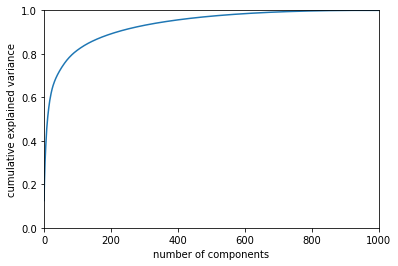

In [16]:
pca = PCA().fit(X_mito)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axis([0,1000,.0,1.0])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

At about 200 features approximately 80% can be explained while at 600 almost 100% is explained. Lets select 400 to have around a 90%

In [17]:

pca = PCA(n_components=400)
pca.fit(X_mito)
pcamito200 = pca.transform(X_mito)

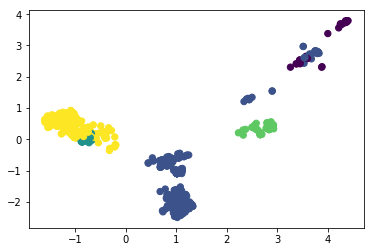

In [18]:
gmm = mixture.GaussianMixture(n_components=5).fit(pcamito200)
labels1 = gmm.predict(pcamito200)
plt.scatter(pcamito200[:, 0], pcamito200[:, 1], c=labels1, s=40, cmap='viridis');

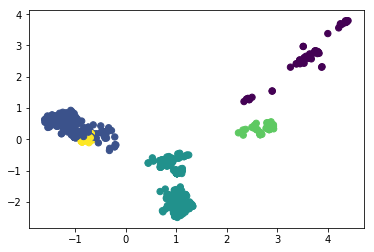

In [19]:
clustering = AgglomerativeClustering(n_clusters=5).fit(pcamito200)
labels = clustering.labels_
plt.scatter(pcamito200[:, 0], pcamito200[:, 1], c=labels, s=40, cmap='viridis')

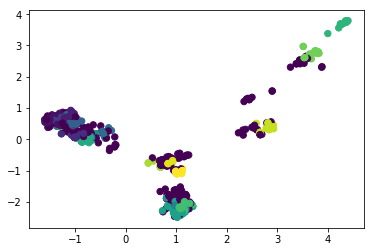

In [20]:
db = DBSCAN(eps=0.3, min_samples=10,metric='cosine').fit(pcamito200)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.scatter(pcamito200[:, 0], pcamito200[:, 1], c=labels, s=40, cmap='viridis')

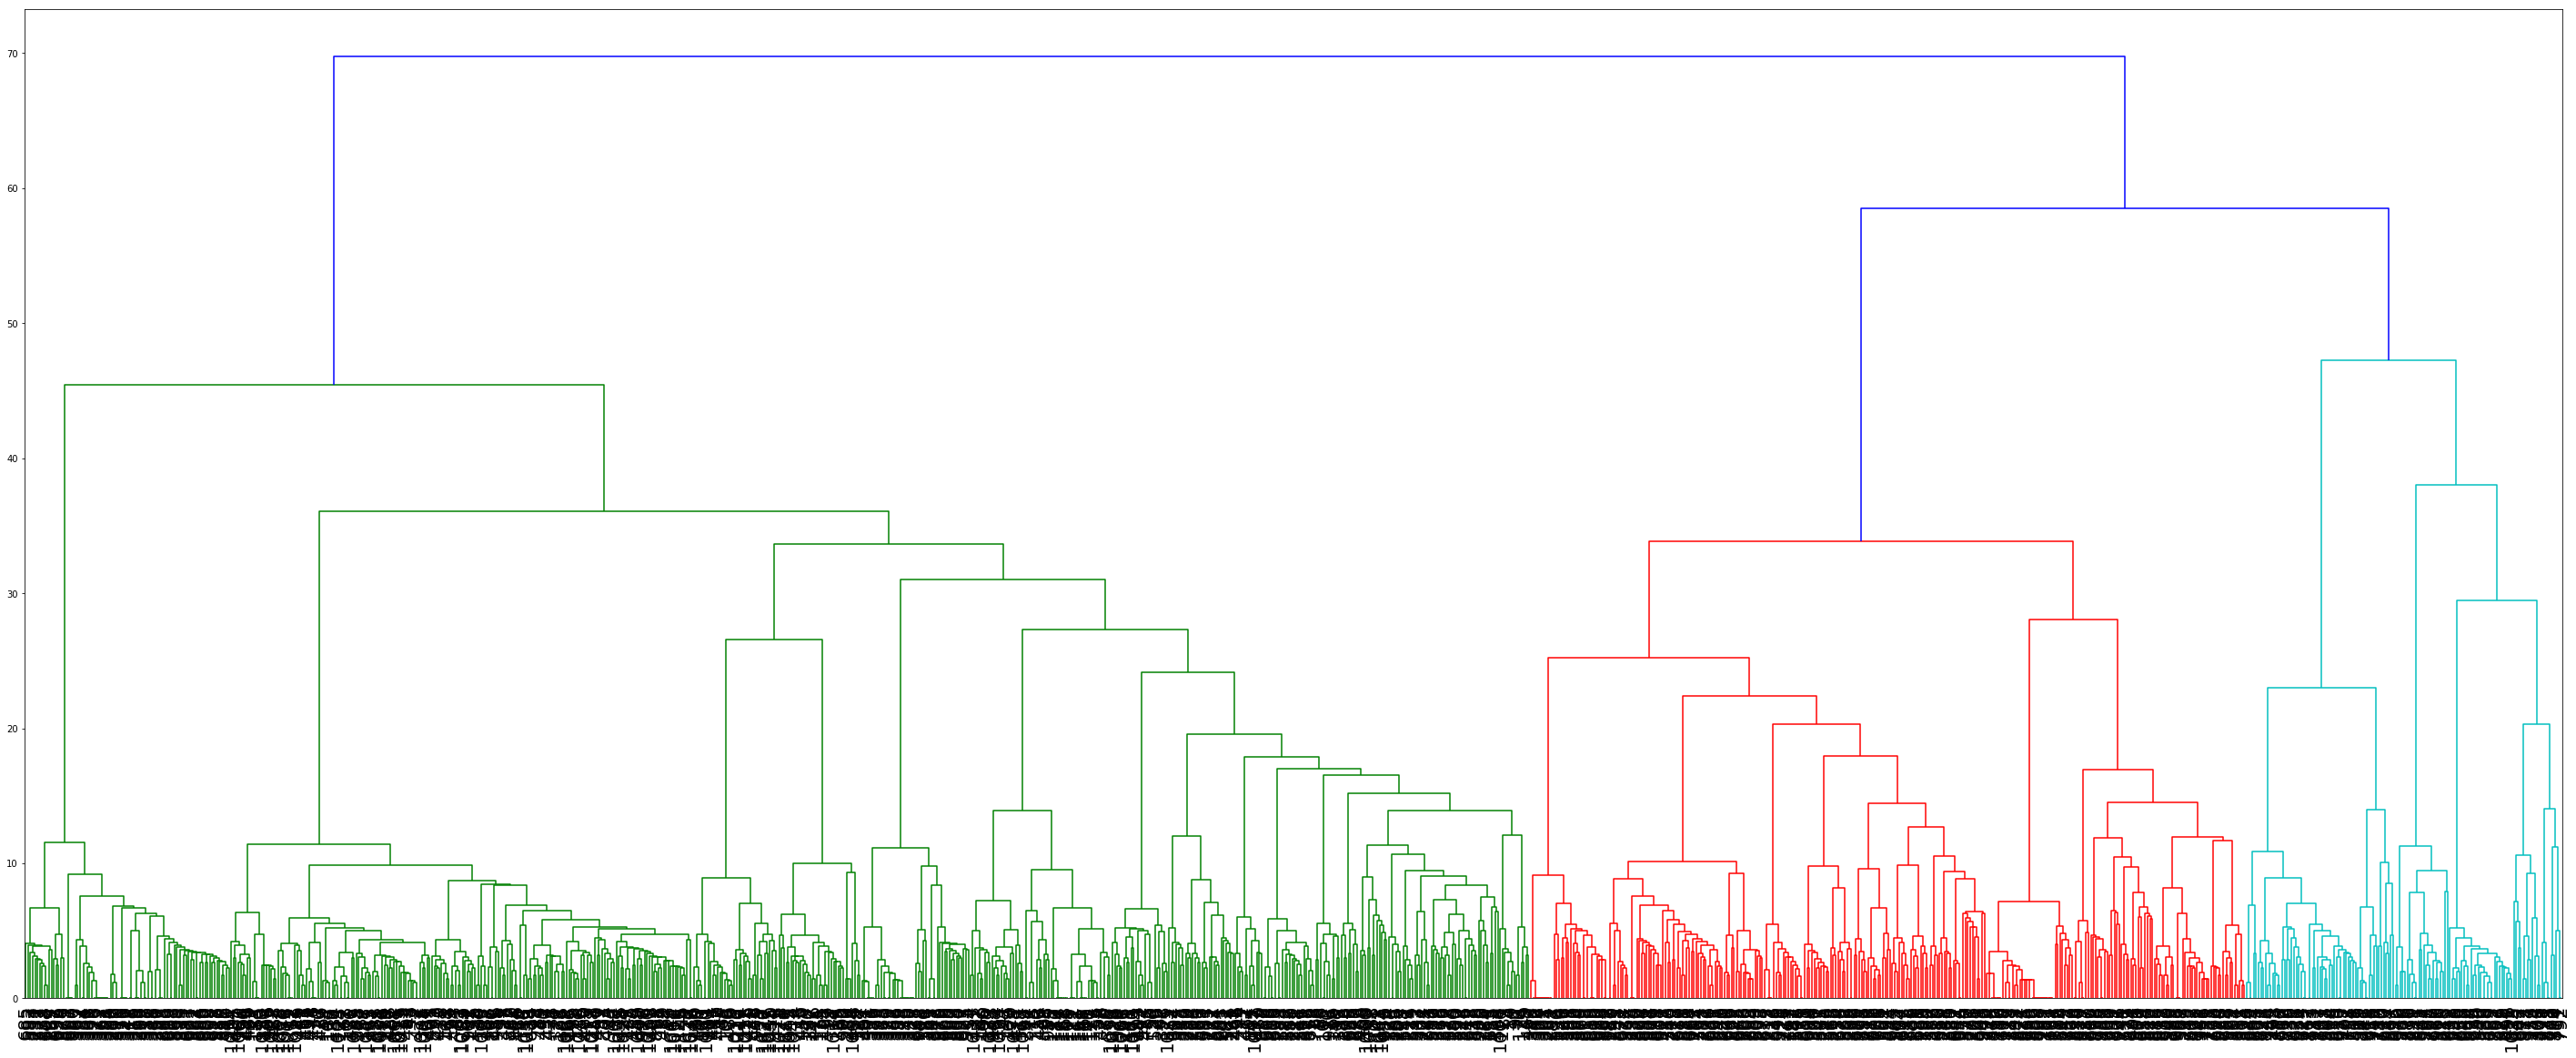

In [21]:
DendrogramMito=linkage (X_mito,'ward')
plt.figure(figsize=(50,20))
dendro=dendrogram(DendrogramMito, leaf_font_size=20)

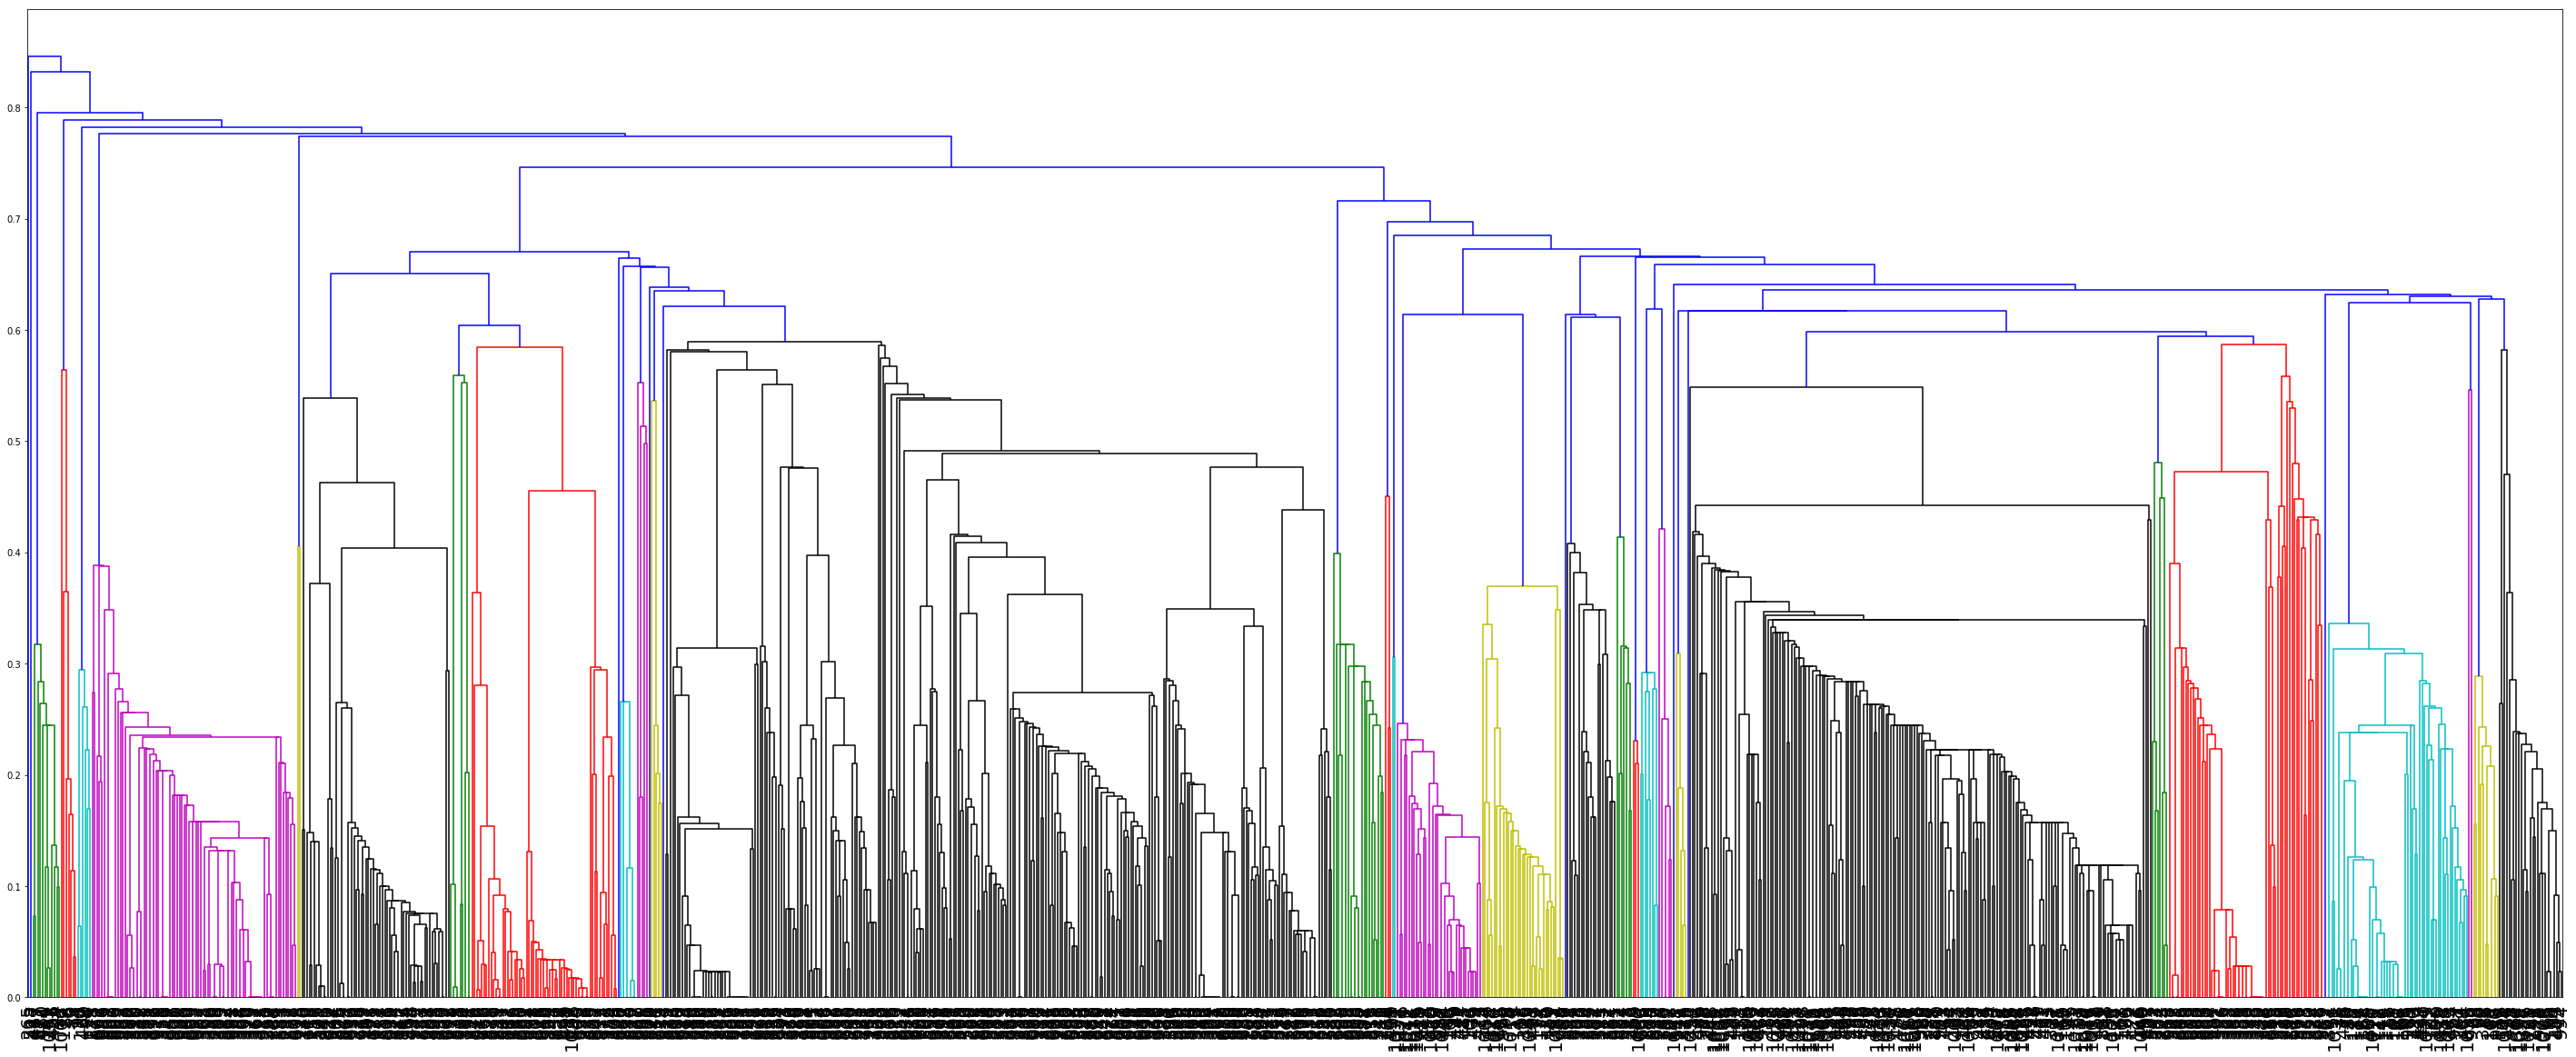

In [22]:
DendrogramMito = linkage(X_mito, 'single', metric ="correlation")
plt.figure(figsize=(50,20))
dendro = dendrogram(DendrogramMito, leaf_font_size=20)

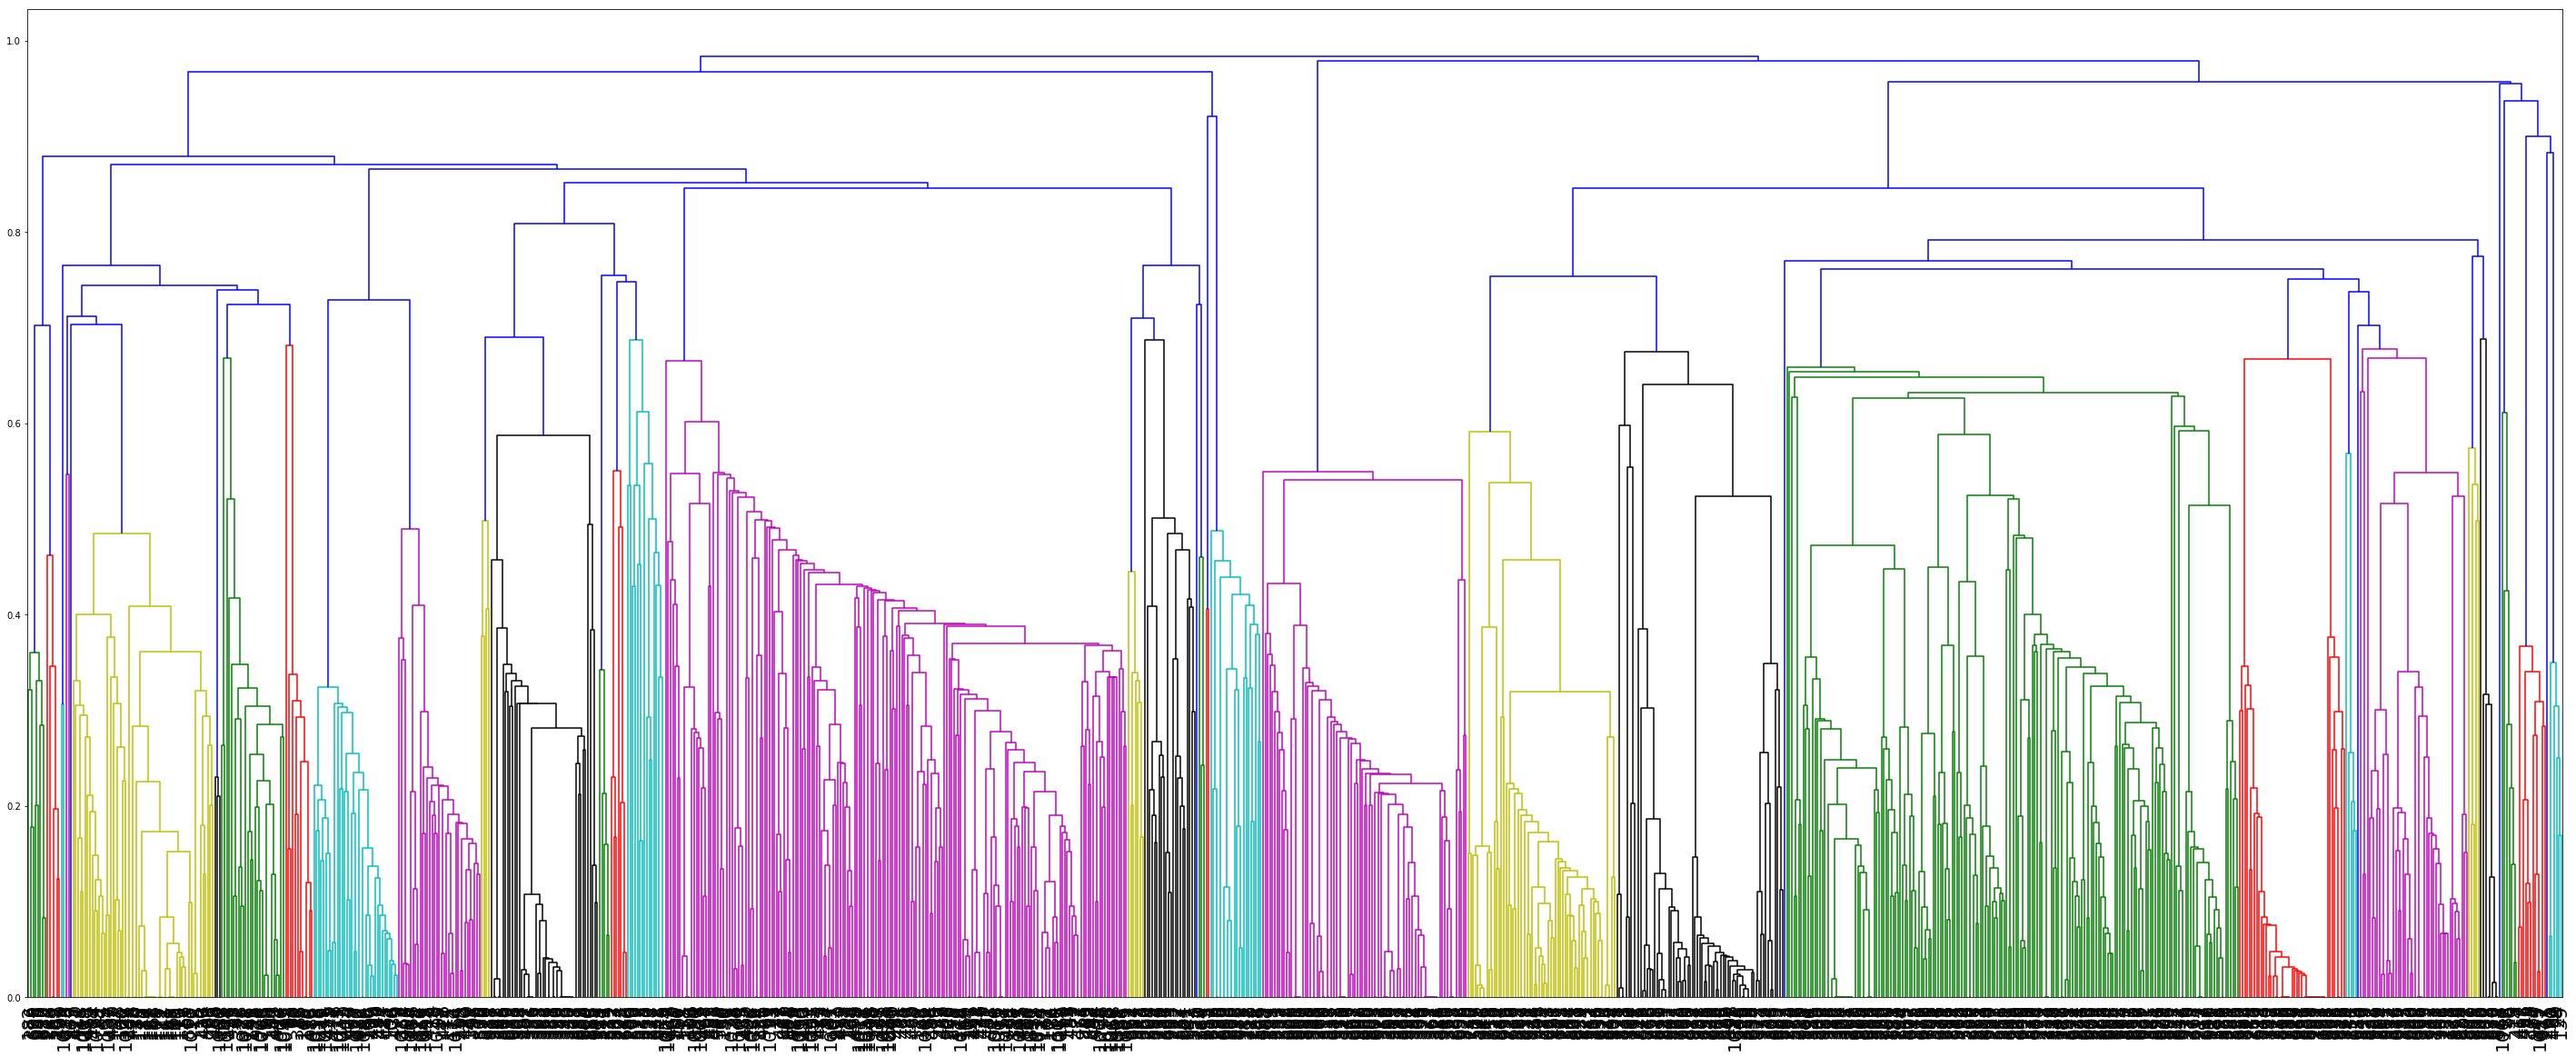

In [23]:
DendrogramMito = linkage(X_mito, 'average', metric ="correlation")
plt.figure(figsize=(50,20))
dendro = dendrogram(DendrogramMito, leaf_font_size=20)

In [24]:
labels = pd.DataFrame(labels1)
labels.columns = ['groupnum']


In [25]:
mitoapr['length'] = mitoapr['itemsets'].apply(lambda x: len(x))

In [26]:
mitoapr

,support,itemsets,length
0,0.270019,(X33),1
1,0.403166,(X1278),1
2,0.406890,(X1447),1
3,0.480447,(X1586),1
4,0.406890,(X1647),1
5,0.465549,(X1919),1
6,0.344507,(X2384),1
7,0.469274,(X2605),1
8,0.402235,"(X1278, X1447)",2
9,0.398510,"(X1278, X1586)",2


In [27]:
labels = pd.DataFrame(labels1)
labels.columns = ['groupnum']

In [28]:
Ygroups = pd.DataFrame(Y_mito)

In [29]:
bytypes = pd.merge(Ygroups, labels, left_index=True, right_index=True)

In [30]:
haplo = bytypes.Group.unique()
clusts = bytypes.groupnum.unique()

In [31]:
first = []
second = []
third = []

for x in haplo :
    x=x
    for j in clusts :
        j=j
        a = bytypes[bytypes["groupnum"]== j]
        b = a[a['Group'] == x].count()['Group']
        
        first.append({x})
        second.append({j})
        third.append({b})

In [32]:
first = pd.DataFrame(first)
first.columns = ['Haplotype']
second = pd.DataFrame(second)
second.columns = ['Cluster']
third = pd.DataFrame(third)
third.columns = ['Count']

df2 = pd.merge(first, second, left_index=True, right_index=True)
df2 = pd.merge(df2, third, left_index=True, right_index=True)
df2 = df2.sort_values(by = 'Count', ascending= False)

In [33]:
#Displaying haplotype and Gaussian clustering with assiciated counts
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df2)

,Haplotype,Cluster,Count
0,H,4,164
20,U,4,78
71,D,1,46
55,B,4,38
126,L2,1,37
5,T,4,35
15,J,4,31
91,A,1,30
131,L3,1,30
70,D,4,30


In [ ]:
# The haplotype H has the highest count being in cluster four
# This is significantly larger than any other haplotype where
#haplotype U only has 78 in comparison, both being in cluster 4.